<a href="https://colab.research.google.com/github/ProfEddie/HypCLIP/blob/perceiver/lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from model.modules.dct import dct
from lavis.datasets.builders import load_dataset
from utils.data_utils import  get_loaders
from lavis.models import load_model_and_preprocess
import torch
import torch.nn as nn
import torch.nn.functional as  F
import matplotlib.pyplot as plt


/home/jarvis/anaconda3/envs/hada-v2/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
COCO_PATH = "/mnt/data/itr_dataset/dataset/coco/images"
FLICKR_PATH = "/mnt/data/itr_dataset/dataset/flickr30k/flickr30k_images"
dataset = load_dataset("flickr30k", vis_path=FLICKR_PATH, cfg_path=None)
model, vis_processors, txt_processors = load_model_and_preprocess("blip_retrieval", "flickr", is_eval=False)

Using downloaded and verified file: /mnt/data/itr_dataset/dataset/flickr30k/annotations/train.json
Using downloaded and verified file: /mnt/data/itr_dataset/dataset/flickr30k/annotations/val.json
Using downloaded and verified file: /mnt/data/itr_dataset/dataset/flickr30k/annotations/test.json


In [3]:

def plot_hidden_states(hidden_states, filtered=False):
  for hidden_state in hidden_states:
    hidden_state=hidden_state.permute(1,0,2)
    x_dct = dct(hidden_state.transpose(0,2), norm='ortho').transpose(0,2)
    if not filtered:
      numpy_array = ((x_dct.permute(1,0,2).mean(0).mean(1))).cpu().detach().numpy()
    else:
      numpy_array = ((x_dct.permute(1,0,2).mean(0).mean(1)))[:350].cpu().detach().numpy()
    plt.figure(figsize=(10, 2))

    # plt.imshow(numpy_array, cmap='viridis')  # You can choose a different colormap
    plt.plot(numpy_array)# You can choose a different colormap
    # plt.colorbar()
    plt.show()



In [4]:
from lavis.models import load_model_and_preprocess
from model.modules.dct_blip import DCTLAVISBlip

model, vis_processors, txt_processors = load_model_and_preprocess("blip_retrieval", "flickr", is_eval=False)
train_loader, val_loader, test_loader = get_loaders(
    10, 
    dataset,
    vis_processor=vis_processors['eval'],
    txt_processor=txt_processors['eval'],
    tokenizer=model.tokenizer,
)
device = torch.device('cpu')
model = DCTLAVISBlip(model)


In [5]:
# from transformers import AutoModel, AutoProcessor
# from model.modules.dct_blip import DCTHFBlip, DCTHFClip
# BLIP_BASE_COCO = "Salesforce/blip-itm-base-coco"
# BLIP_LARGE_COCO = "Salesforce/blip-itm-large-coco"
# CLIP_BASE_PATCH_32 = "openai/clip-vit-base-patch32"
# CLIP_BASE_PATCH_16 = "openai/clip-vit-base-patch16"
# CLIP_LARGE_PATCH_14 = "openai/clip-vit-large-patch14"
# BLIP_BASE = "Salesforce/blip-image-captioning-base"
# BLIP_BASE_FLICKR = "Salesforce/blip-itm-base-flickr"
# BLIP_LARGE_FLICKR = "Salesforce/blip-itm-large-flickr"
# BLIP_LARGE_FLICKR = "Salesforce/blip-itm-large-coco"
# LAVIS_BLIP_BASE_FLICKR = "lavis-blip-itm-base-flickr"
# LAVIS_BLIP_BASE_COCO= "lavis-blip-itm-base-coco"
# model = AutoModel.from_pretrained(CLIP_BASE_PATCH_16)
# # device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# device = torch.device('cpu')
# model = DCTHFClip(model).to(device)
# processor = AutoProcessor.from_pretrained(
#     CLIP_BASE_PATCH_16
# )
# train_loader, val_loader, test_loader = get_loaders(
#     40, 
#     dataset,
#     vis_processor=processor,
#     txt_processor=None,
#     tokenizer=processor,
# )

  0%|          | 0/1000 [00:00<?, ?it/s]


torch.Size([1, 569, 768])
torch.Size([1, 576, 768])


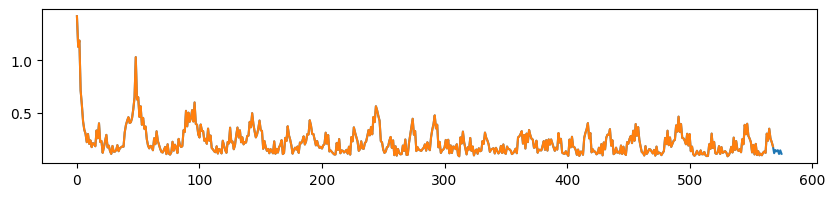

torch.Size([1, 470, 768])
torch.Size([1, 576, 768])


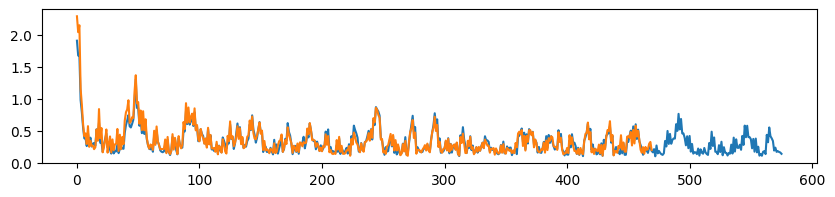

torch.Size([1, 442, 768])
torch.Size([1, 576, 768])


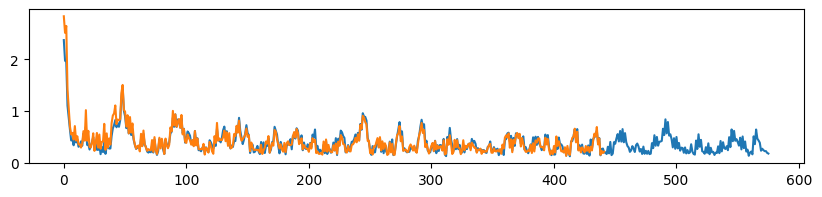

torch.Size([1, 436, 768])
torch.Size([1, 576, 768])


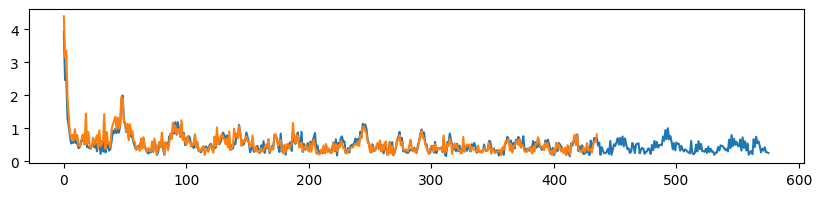

torch.Size([1, 435, 768])
torch.Size([1, 576, 768])


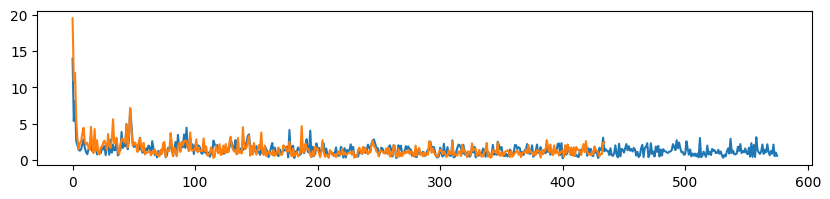

In [6]:
from tqdm.auto import tqdm
import numpy as np
for batch in tqdm(test_loader):
    break
with torch.no_grad():
    # print(batch['pixel_values'].shape)
    _,_, hidden_states,x_dct = model.get_vision_features(pixel_values=batch['pixel_values'].to(device), apply_fourier=False,return_all_fourier_signals=True)
    _,_, filtered_hidden_states,x_dct_filtered = model.get_vision_features(pixel_values=batch['pixel_values'].to(device), apply_fourier=True, return_all_fourier_signals=True)
    for i in range(len(filtered_hidden_states)):
        
        # filtered_hidden_state = filtered_hidden_states[i].permute(1,0,2)
        # hidden_state = hidden_states[i].permute(1,0,2)
        # x_dct_filtered = dct(filtered_hidden_state.transpose(0,2), norm='ortho').transpose(0,2)
        # x_dct = dct(hidden_state.transpose(0,2), norm='ortho').transpose(0,2)[:x_dct_filtered.shape[0],:, :]
        # x_dct_filtered =x_dct_filtered.permute(1,0,2)
        # x_dct = x_dct.permute(1,0,2)
        # threshold = 0.05 
        pred = torch.abs(x_dct_filtered[i])
        # pred = upsample(pred.permute(0,2,1)).permute(0,2,1)
        target = torch.abs(x_dct[i])
        print(pred.shape)
        print(hidden_states[i].shape)
        # pred_amplitude = torch.abs(x_dct_filtered[i])
      
        x_dct_filtered_mean =pred.mean(0).mean(1)
        x_dct_mean = target.mean(0).mean(1)
        # threshold =torch.quantile(x_dct_mean, 0.95, dim=-1, keepdim=True) 

        # indices = torch.where(x_dct_mean > threshold)
        # last_index = indices[0][-1].item() if indices[0].numel() > 0 else -1
        # print(threshold)
        # print(last_index)

        plt.figure(figsize=(10, 2))
        plt.plot(x_dct_mean.cpu().detach().numpy())
        plt.plot(x_dct_filtered_mean.cpu().detach().numpy())
        plt.show()
      

# plot_hidden_states(hidden_states, filtered=True)

In [7]:
torch.cat([x_dct_filtered[1], pred], dim=1).shape

torch.Size([1, 905, 768])

In [8]:
hidden_states[0].shape

torch.Size([1, 576, 768])

In [38]:
a_big = hidden_states[0]
u, s, v = torch.svd(a_big.to(torch.float32))
k = 569 
print(u.shape, s.shape, v.shape)
a_new = torch.matmul(torch.matmul(u[:, :k, :k], torch.diag_embed(s[:,:k])), v.mT[:,:k, :])

torch.Size([1, 576, 576]) torch.Size([1, 576]) torch.Size([1, 768, 576])


In [61]:
threshold = torch.quantile(torch.log(s), 0.1, dim=-1, keepdim=True)
indices = torch.where(torch.log(s) > threshold)[-1]
indices

tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
         42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
         70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
         84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
         98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
        112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
        140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
        154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 1

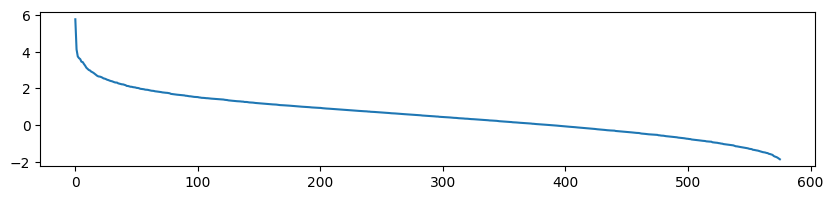

In [57]:

plt.figure(figsize=(10, 2))
plt.plot(np.log(s[0].cpu().detach().numpy()))
plt.show()
      

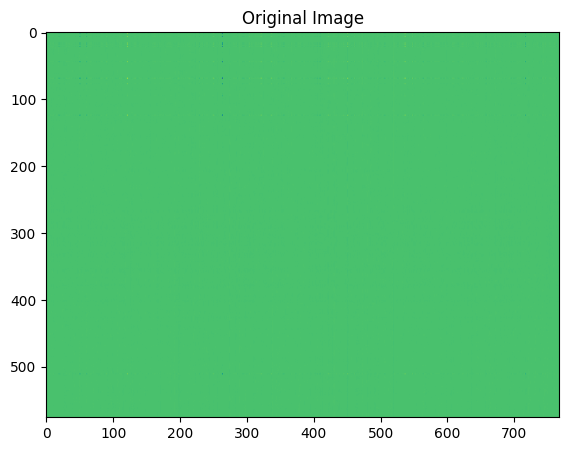

In [41]:
plt.figure(figsize=(10, 5))


plt.imshow(a_big[0], cmap='viridis')
plt.title('Original Image')
plt.show()

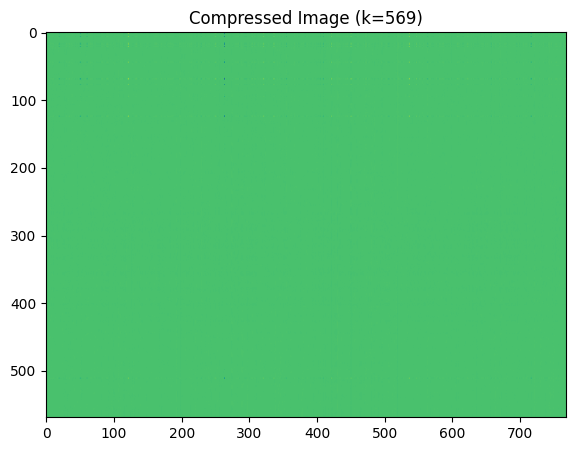

In [44]:
plt.figure(figsize=(10, 5))


plt.imshow(a_new[0], cmap='viridis')
plt.title(f'Compressed Image (k={k})')

plt.show()

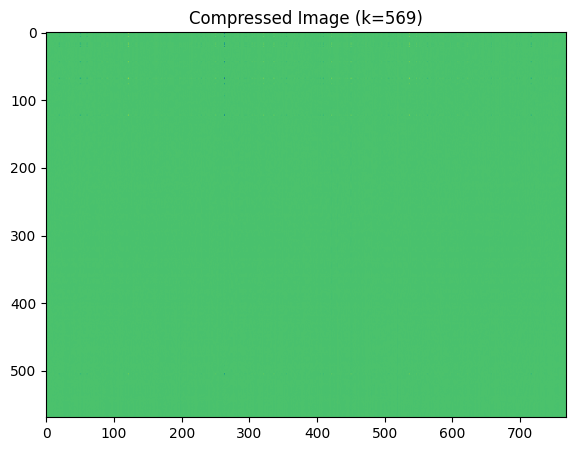

In [46]:
plt.figure(figsize=(10, 5))


plt.imshow(filtered_hidden_states[0][0], cmap='viridis')
plt.title(f'Compressed Image (k={k})')

plt.show()